In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

In [3]:
# Load dataset
df = pd.read_csv('Dataset/cleaned_adult.csv')

In [4]:
features = df.drop(columns=['income']) 
label = df['income'] #predict 

In [5]:
# Apply Standard Scaler for the features
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

In [6]:
# Split the dataset into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(36140, 13)

In [8]:
X_test.shape

(9035, 13)

# Model Training

In [9]:
# Create a random forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

In [10]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid = param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

#Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8578029883785279


In [11]:
# Training the Random Forest model with the best parameters
best_params_ = grid_search.best_params_
random_forest_model = RandomForestClassifier(**best_params_)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

# Model Testing

In [12]:
# Make predictions on the test data
predictions = random_forest_model.predict(X_test)

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8648588821250692


In [14]:
# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6830
           1       0.76      0.65      0.70      2205

    accuracy                           0.86      9035
   macro avg       0.83      0.79      0.81      9035
weighted avg       0.86      0.86      0.86      9035



In [33]:
# Predict class labels on the training dataset
y_train_pred_nb = random_forest_model.predict(X_train)

# Predict class labels on the testing dataset
y_test_pred_nb = random_forest_model.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_nb)
print(f'\nTraining Accuracy: {train_accuracy:.2f}')

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_nb)
print(f'Testing Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.91
Testing Accuracy: 0.86


# Model Testing Visualization 

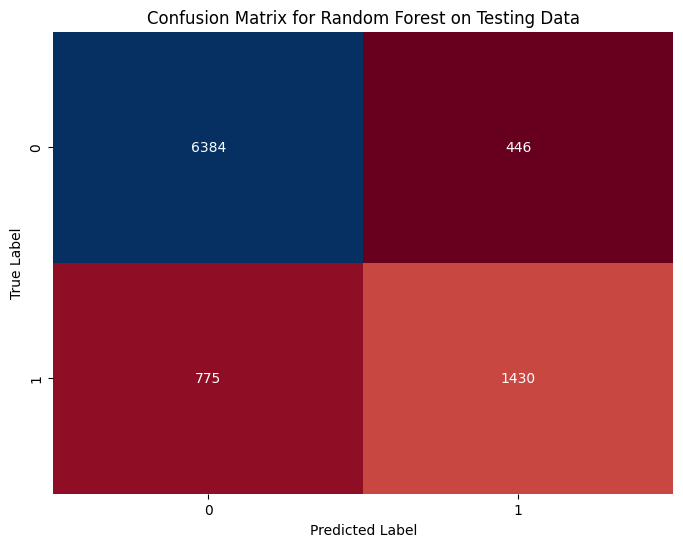

In [34]:
# Get the confusion matrix
confusion_matrix_rf = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='RdBu', cbar=False,
            xticklabels=random_forest_model.classes_,
            yticklabels=random_forest_model.classes_)
plt.title('Confusion Matrix for Random Forest on Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


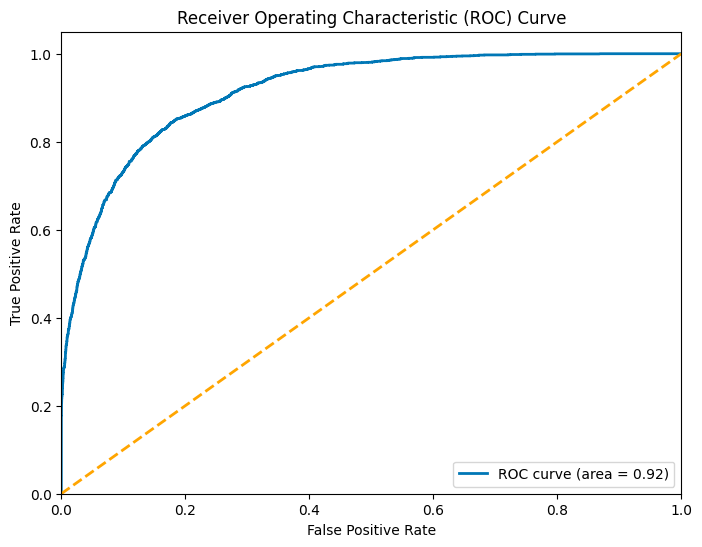

In [37]:
y_true = y_test
y_scores = random_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute ROC area under the curve
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#0077b6', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
